In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import bz2
import ujson
import attr
import os
import math

import pandas as pd

from glob import glob
from collections import Counter, UserDict
from itertools import islice
from tqdm import tqdm_notebook

In [3]:
def zip_offset(seq):
    for i, item in enumerate(seq):
        offset = i / (len(seq)-1)
        yield item, offset

In [4]:
def zip_bin(seq, bin_count):
    for item, offset in zip_offset(seq):
        bin = math.floor(offset * bin_count) if offset < 1 else bin_count - 1
        yield item, bin

In [5]:
@attr.s
class Corpus:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [6]:
corpus = Corpus('/Users/dclure/Projects/data/novels.20.json/')

In [7]:
counts = Counter()
for novel in islice(corpus.novels(), 10):
    for token in [t.lower() for t in novel['token']]:
        counts[token] += 1

HBox(children=(IntProgress(value=0), HTML(value='')))

In [8]:
sum(counts.values())

4919261

In [9]:
vocab = set([t for t, _ in counts.most_common(200)])

In [10]:
BIN_COUNT = 20

In [119]:
rows = []
for novel in islice(corpus.novels(), 10):
    
    bin_size = len(novel['token']) / BIN_COUNT
    
    counts = Counter()
    for token, bin in zip_bin(novel['token'], BIN_COUNT):
        if token in vocab:
            counts[token, bin] += 1
            
    for (token, bin), count in counts.items():
        rel_count = count / (len(novel['token']) / BIN_COUNT)
        rows.append((novel['corpus'], novel['identifier'], token, bin, count, rel_count))

HBox(children=(IntProgress(value=0), HTML(value='')))

In [128]:
bc = pd.DataFrame(rows, columns=('corpus', 'identifier', 'token', 'bin', 'count', 'rel_count'))
bc = bc.sort_values(['corpus', 'identifier', 'bin'])

In [129]:
bc_totals = dict(bc.groupby(['corpus', 'identifier', 'token'])['count'].sum())

In [130]:
bc['unbinned_count'] = bc.apply(lambda r: bc_totals[r['corpus'], r['identifier'], r['token']], axis=1)

In [131]:
bc['pct'] = bc['count'] / bc['unbinned_count']

In [132]:
bc

,corpus,identifier,token,bin,count,rel_count,unbinned_count,pct
7805,gale,AMFCF0002-C00000-B0013500,.,0,471,0.022539,11780,0.039983
7806,gale,AMFCF0002-C00000-B0013500,",",0,1553,0.074317,31189,0.049793
7807,gale,AMFCF0002-C00000-B0013500,a,0,294,0.014069,6270,0.046890
7808,gale,AMFCF0002-C00000-B0013500,on,0,112,0.005360,2033,0.055091
7809,gale,AMFCF0002-C00000-B0013500,“,0,301,0.014404,2020,0.149010
7810,gale,AMFCF0002-C00000-B0013500,man,0,25,0.001196,650,0.038462
7811,gale,AMFCF0002-C00000-B0013500,is,0,87,0.004163,2987,0.029126
7812,gale,AMFCF0002-C00000-B0013500,himself,0,22,0.001053,300,0.073333
7813,gale,AMFCF0002-C00000-B0013500,to,0,483,0.023113,8431,0.057289
7814,gale,AMFCF0002-C00000-B0013500,such,0,31,0.001483,384,0.080729


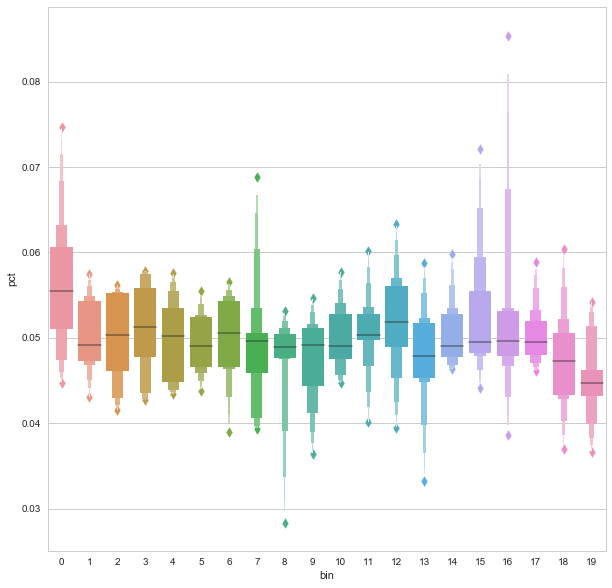

In [112]:
plt.figure(figsize=(10, 10))
sns.lvplot(data=bc[bc['token']=='a'], x='bin', y='pct')